#AtomCountDescriptors
1. nAtom	Number of atoms
2. nHeavyAtom	Number of heavy atoms (i.e. not hydrogen)
3. nH	Number of hydrogen atoms
4. nB	Number of boron atoms
5. nC	Number of carbon atoms
6. nN	Number of nitrogen atoms
7. nO	Number of oxygen atoms
8. nS	Number of sulphur atoms
9. nP	Number of phosphorus atoms
10. nF	Number of fluorine atoms
11. nCl	Number of chlorine atoms
12. nBr	Number of bromine atoms
13. nI	Number of iodine atoms
14. nX	Number of halogen atoms (F, Cl, Br, I, At, Uus)

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data_smiles = pd.read_csv("../smiles.csv")
data_cal_des = pd.read_csv("../Calculated_descriptors.csv")

In [3]:
data_smiles.head(5)

,Compound No.,SMILES,pIC50 (IC50 in microM)
0,1,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,-0.477121255
1,2,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,-1
2,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,-1.041392685
3,4,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,BLINDED
4,5,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,-1.146128036


In [4]:
data_cal_des.head(5)

,Unnamed: 0,smile_ID,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,0,1.8674,3.487183,134.2482,61.657102,23,23,44,...,0.844559,0.143400,0.576319,0.397215,0.359925,38.197213,194.058561,313.526691,0.766839,1.333459
1,1,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,0,2.5212,6.356449,136.2083,62.914895,22,22,48,...,0.703605,0.273316,0.651215,0.490695,0.445324,34.140103,250.421523,461.173977,0.555407,1.587235
2,2,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,0,3.4635,11.995832,148.8825,70.371067,22,22,51,...,0.760510,0.177701,0.505675,0.446498,0.346187,31.942735,197.041832,501.140741,0.640766,1.298360
3,3,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,0,3.4635,11.995832,148.8825,70.371067,22,22,51,...,0.834081,0.115310,0.515730,0.349506,0.368112,34.145644,168.156090,396.080916,0.751122,1.233349
4,4,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,0,0.4261,0.181561,128.1008,59.957102,22,22,43,...,0.839833,0.100089,0.560831,0.371489,0.360291,35.016049,172.302879,424.136183,0.759750,1.292610


1. nAtom	Number of atoms

{'whiskers': [<matplotlib.lines.Line2D at 0x22e89a1eec8>,
 'caps': [<matplotlib.lines.Line2D at 0x22e89a4bd08>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e89a3df08>],
 'medians': [<matplotlib.lines.Line2D at 0x22e89a4bdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22e89a4b448>],
 'means': []}

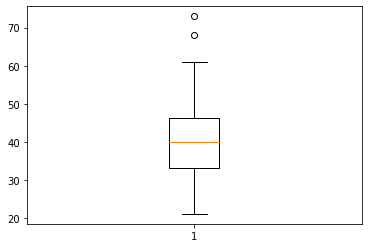

In [5]:
%matplotlib inline
nAtom = data_cal_des["nAtom"]
import matplotlib.pyplot as plt
plt.boxplot(nAtom)

(array([ 6., 10., 27., 14., 21., 12.,  7.,  5.,  0.,  2.]),
 array([21. , 26.2, 31.4, 36.6, 41.8, 47. , 52.2, 57.4, 62.6, 67.8, 73. ]),
 <BarContainer object of 10 artists>)

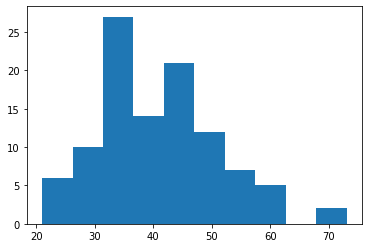

In [6]:
plt.hist(nAtom,bins= 10)

In [12]:
data = pd.read_excel("2Ddes.xlsx")

data.head(5)



,Descriptor Java Class,Descriptor,Description,Class
0,AcidicGroupCountDescriptor,nAcid,Number of acidic groups. The list of acidic gr...,2D
1,ALOGPDescriptor,ALogP,Ghose-Crippen LogKow,2D
2,NaN,ALogP2,Square of ALogP,2D
3,NaN,AMR,Molar refractivity,2D
4,APolDescriptor,apol,Sum of the atomic polarizabilities (including ...,2D


In [17]:
descriptor_class = data["Descriptor Java Class"]
descriptor_class

0       AcidicGroupCountDescriptor
1                  ALOGPDescriptor
2                              NaN
3                              NaN
4                   APolDescriptor
                   ...            
1439                           NaN
1440       WienerNumbersDescriptor
1441                           NaN
1442               XLogPDescriptor
1443         ZagrebIndexDescriptor
Name: Descriptor Java Class, Length: 1444, dtype: object

In [19]:
from collections import Counter 
  
def countDistinct(descriptor_class): 
  
    # counter method gives dictionary of elements in list 
    # with their corresponding frequency. 
    # using keys() method of dictionary data structure 
    # we can count distinct values in array 
    return len(Counter(descriptor_class).keys())

Counter(descriptor_class)

Counter({'AcidicGroupCountDescriptor': 1,
         'ALOGPDescriptor': 1,
         nan: 1389,
         'APolDescriptor': 1,
         'AromaticAtomsCountDescriptor': 1,
         'AromaticBondsCountDescriptor': 1,
         'AtomCountDescriptor': 1,
         'AutocorrelationDescriptor': 1,
         'BaryszMatrixDescriptor': 1,
         'BasicGroupCountDescriptor': 1,
         'BCUTDescriptor': 1,
         'PaDELBondCountDescriptor': 1,
         'BPolDescriptor': 1,
         'BurdenModifiedEigenvaluesDescriptor': 1,
         'PaDELCarbonTypesDescriptor': 1,
         'ChiChainDescriptor': 1,
         'ChiClusterDescriptor': 1,
         'ChiPathClusterDescriptor': 1,
         'PaDELChiPathDescriptor': 1,
         'ConstitutionalDescriptor': 1,
         'CrippenDescriptor': 1,
         'DetourMatrixDescriptor': 1,
         'EccentricConnectivityIndexDescriptor': 1,
         'ElectrotopologicalStateAtomTypeDescriptor': 1,
         'ExtendedTopochemicalAtomDescriptor': 1,
         'FMFDescriptor